In [522]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import fftpack
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (22, 6)
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'datetime', 'fftpack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [523]:
df = pd.read_csv('Data/BMS/Rooms and HVAC/RCU middenhal.csv', delimiter=';', encoding='utf-8')

In [524]:
df_data = df[['Tijdstip', 'Gemiddelde ruimtetemp [°C] - RCU Middelhal 255 ()', 'Luchtkwaliteitopnemer [ppm] - RCU Middelhal 255 (255QT01)']]
df_data.is_copy = False
df_data.columns = ['Time', 'Temperature', 'CO2']

In [525]:
df_data.is_copy = False
df_data['Time'] = pd.to_datetime(df_data['Time'], format="%d-%m-%Y %H:%M.%S")

df_data['Temperature'] = [str(x).replace(',', '.') for x in df_data['Temperature']]
df_data['Temperature'] = pd.to_numeric(df_data['Temperature'], errors='coerce')
df_data['CO2'] = pd.to_numeric(df_data['CO2'], errors='coerce')

In [526]:
df_temp.sort_values(['Time'], inplace=True)

In [527]:
df_data = df_data.loc[df_data['Time'] > datetime.datetime(2017, 10, 23, 9, 0, 0)]
df_data = df_data.loc[df_data['Time'] <= datetime.datetime(2018, 2, 28, 13, 56, 0)]

In [528]:
# mean = df_data['Temperature'].mean()
# df_data['Temperature_normalized'] = [(i-mean)/mean for i in list(df_data['Temperature'])]

# mean = df_data['CO2'].mean()
# df_data['CO2_normalized'] = [(i-mean)/mean for i in list(df_data['CO2'])]

In [529]:
df_data['Temperature_normalized'] = list(df_data['Temperature'])
df_data['CO2_normalized'] = list(df_data['CO2'])

In [530]:
def shift(row, mean):

    return (row - mean)

def multi_resolution(df, column1, column2, freq):

    grouped =  df.groupby(pd.Grouper(key='Time', freq=freq))
    norm_df = pd.DataFrame()
    
    mean_temp_list = []
    mean_CO2_list = []
    
    mean_temp_list_actual = []
    mean_CO2_list_actual = []
    
    for name, group in grouped:
        df_sub = pd.DataFrame(group)
        
        mean_temp = df_sub[column1].mean()
        mean_temp_actual = df_sub['Temperature'].mean()
        mean_temp_list.append(mean_temp)
        mean_temp_list_actual.append(mean_temp_actual)
        df_sub['Temperature_piecewise'] = mean_temp
        
        mean_CO2 = df_sub[column2].mean()
        mean_CO2_actual = df_sub['CO2'].mean()
        mean_CO2_list.append(mean_CO2)
        mean_CO2_list_actual.append(mean_CO2_actual)
        df_sub['CO2_piecewise'] = mean_CO2
        
        df_sub['Temperature_shifted'] = df_sub.apply(lambda row: shift(row[column1], mean_temp), axis=1)
        df_sub['CO2_shifted'] = df_sub.apply(lambda row: shift(row[column2], mean_CO2), axis=1)
        
        norm_df = norm_df.append(df_sub)
    
    return norm_df, list(mean_temp_list), list(mean_CO2_list), list(mean_temp_list_actual), list(mean_CO2_list_actual)

In [531]:
df_data, mean_temp_week, mean_CO2_week, mean_temp_week_actual, mean_CO2_week_actual = multi_resolution(df_data, 'Temperature_normalized', \
                                                        'CO2_normalized', 'W')

In [532]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_normalized', 'CO2_normalized', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week']

In [533]:
df_data, mean_temp_day, mean_CO2_day, mean_temp_day_actual, mean_CO2_day_actual = multi_resolution(df_data, 'Temperature_shifted_week', \
                                                      'CO2_shifted_week', 'D')

In [534]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_normalized', 'CO2_normalized', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day']

In [535]:
df_data, mean_temp_2H, mean_CO2_2H, mean_temp_2H_actual, mean_CO2_2H_actual = multi_resolution(df_data, 'Temperature_shifted_day', \
                                                      'CO2_shifted_day', '2H')

In [536]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_normalized', 'CO2_normalized', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H']

In [537]:
df_data, mean_temp_32Min, mean_CO2_32Min, mean_temp_32Min_actual, mean_CO2_32Min_actual = multi_resolution(df_data, 'Temperature_shifted_2H', \
                                                      'CO2_shifted_2H', '32Min')

In [538]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_normalized', 'CO2_normalized', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H', \
                  'Temperature_piecewise_32Min', 'CO2_piecewise_32Min', 'Temperature_shifted_32Min', 'CO2_shifted_32Min']

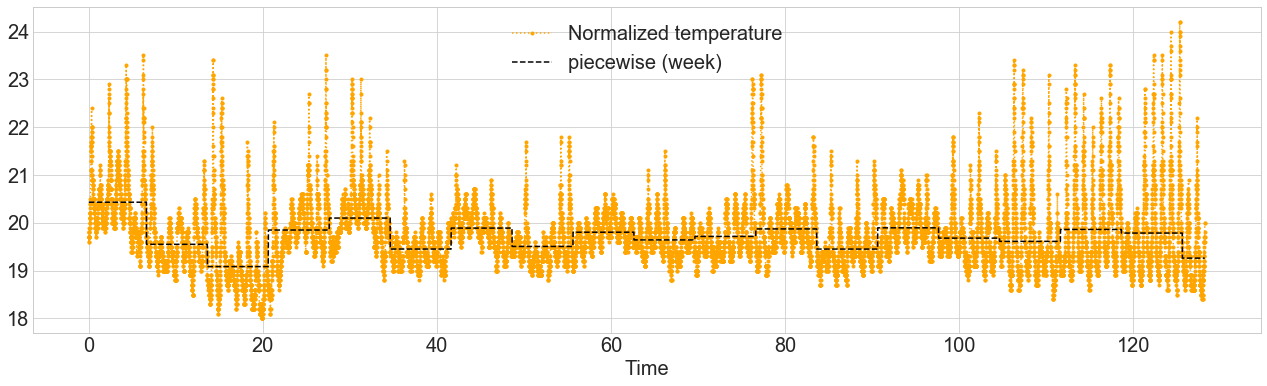

In [539]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_normalized'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
plt.plot(x_range, df_data['Temperature_piecewise_week'], linestyle='--', color="black", label = "piecewise (week)")
plt.legend()
plt.xlabel('Time')
plt.show()

In [540]:
df_data

,Time,Temperature,CO2,Temperature_normalized,CO2_normalized,Temperature_piecewise_week,CO2_piecewise_week,Temperature_shifted_week,CO2_shifted_week,Temperature_piecewise_day,...,Temperature_shifted_day,CO2_shifted_day,Temperature_piecewise_2H,CO2_piecewise_2H,Temperature_shifted_2H,CO2_shifted_2H,Temperature_piecewise_32Min,CO2_piecewise_32Min,Temperature_shifted_32Min,CO2_shifted_32Min
25170,2017-10-23 09:04:00,19.6,582.0,19.6,582.0,20.431098,638.421626,-0.831098,-56.421626,0.259973,...,-1.091071,-37.053571,-0.991071,-36.625000,-1.000000e-01,-0.428571,-0.025000,0.571429,-7.500000e-02,-1.000000
25169,2017-10-23 09:12:00,19.7,584.0,19.7,584.0,20.431098,638.421626,-0.731098,-54.421626,0.259973,...,-0.991071,-35.053571,-0.991071,-36.625000,-5.551115e-16,1.571429,-0.025000,0.571429,2.500000e-02,1.000000
25168,2017-10-23 09:20:00,19.7,584.0,19.7,584.0,20.431098,638.421626,-0.731098,-54.421626,0.259973,...,-0.991071,-35.053571,-0.991071,-36.625000,-5.551115e-16,1.571429,-0.025000,0.571429,2.500000e-02,1.000000
25167,2017-10-23 09:28:00,19.7,582.0,19.7,582.0,20.431098,638.421626,-0.731098,-56.421626,0.259973,...,-0.991071,-37.053571,-0.991071,-36.625000,-5.551115e-16,-0.428571,-0.025000,0.571429,2.500000e-02,-1.000000
25166,2017-10-23 09:36:00,19.7,583.0,19.7,583.0,20.431098,638.421626,-0.731098,-55.421626,0.259973,...,-0.991071,-36.053571,-0.991071,-36.625000,-5.551115e-16,0.571429,0.013333,-1.854762,-1.333333e-02,2.426190
25165,2017-10-23 09:44:00,19.8,582.0,19.8,582.0,20.431098,638.421626,-0.631098,-56.421626,0.259973,...,-0.891071,-37.053571,-0.991071,-36.625000,1.000000e-01,-0.428571,0.013333,-1.854762,8.666667e-02,1.426190
25164,2017-10-23 09:52:00,19.7,580.0,19.7,580.0,20.431098,638.421626,-0.731098,-58.421626,0.259973,...,-0.991071,-39.053571,-0.991071,-36.625000,-5.551115e-16,-2.428571,0.013333,-1.854762,-1.333333e-02,-0.573810
25163,2017-10-23 10:00:00,19.8,579.0,19.8,579.0,20.431098,638.421626,-0.631098,-59.421626,0.259973,...,-0.891071,-40.053571,-0.844405,-34.920238,-4.666667e-02,-5.133333,0.013333,-1.854762,-6.000000e-02,-3.278571
25162,2017-10-23 10:08:00,19.6,581.0,19.6,581.0,20.431098,638.421626,-0.831098,-57.421626,0.259973,...,-1.091071,-38.053571,-0.844405,-34.920238,-2.466667e-01,-3.133333,-0.171667,-4.133333,-7.500000e-02,1.000000
25161,2017-10-23 10:16:00,19.7,581.0,19.7,581.0,20.431098,638.421626,-0.731098,-57.421626,0.259973,...,-0.991071,-38.053571,-0.844405,-34.920238,-1.466667e-01,-3.133333,-0.171667,-4.133333,2.500000e-02,1.000000


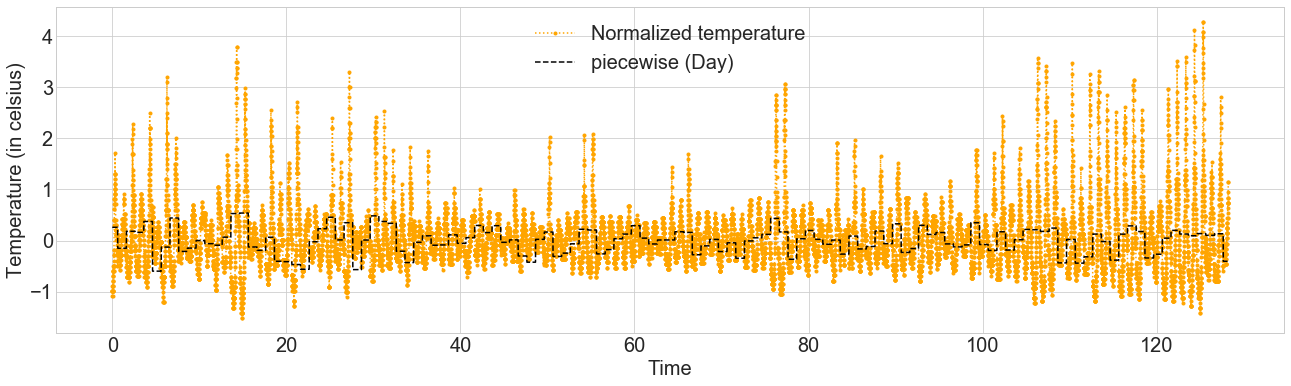

In [541]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_shifted_day'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
plt.plot(x_range, df_data['Temperature_piecewise_day'], linestyle='--', color="black", label = "piecewise (Day)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature (in celsius)')
plt.show()

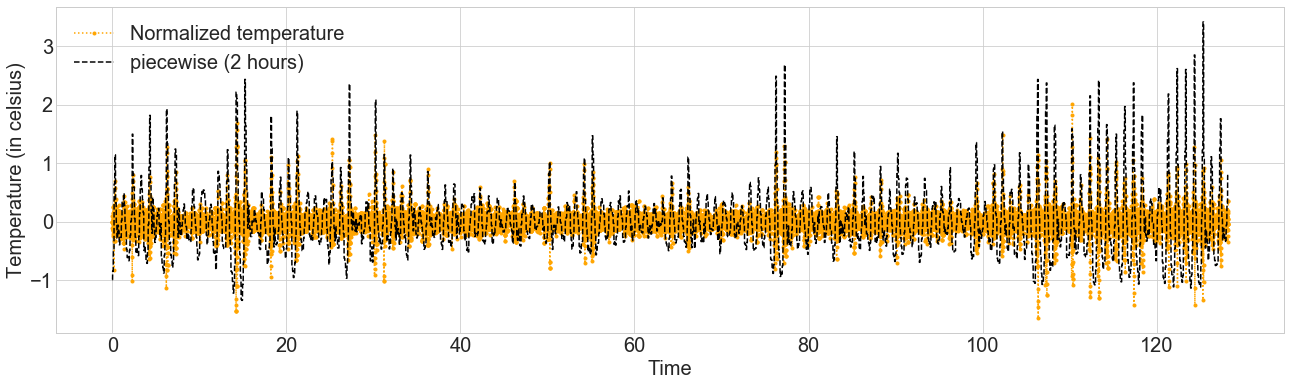

In [542]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_shifted_2H'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
plt.plot(x_range, df_data['Temperature_piecewise_2H'], linestyle='--', color="black", label = "piecewise (2 hours)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature (in celsius)')
plt.show()

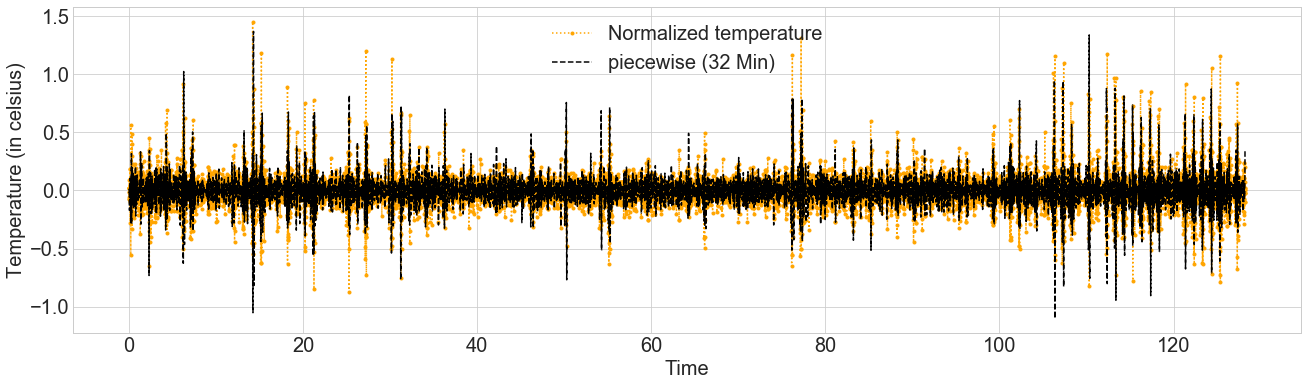

In [543]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_shifted_32Min'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
plt.plot(x_range, df_data['Temperature_piecewise_32Min'], linestyle='--', color="black", label = "piecewise (32 Min)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature (in celsius)')
plt.show()

In [544]:
def autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[int(result.size/2):]

In [545]:
mean = np.mean(mean_temp_day_actual)
mean_temp_day_actual_centered =  [i-mean for i in mean_temp_day_actual]

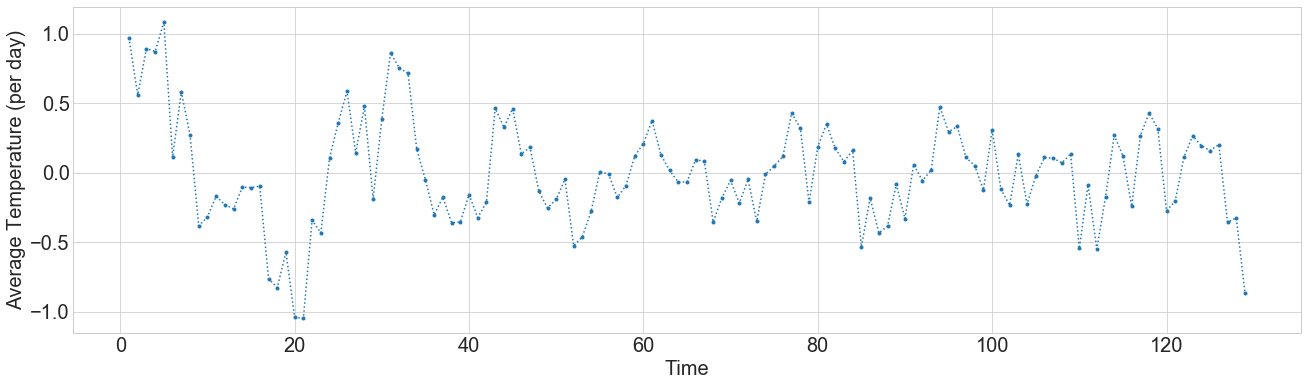

In [547]:
plt.plot(range(1, len(mean_temp_day_actual)+1), mean_temp_day_actual_centered, linestyle=':', marker='.')
# plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Average Temperature (per day)')
plt.show()

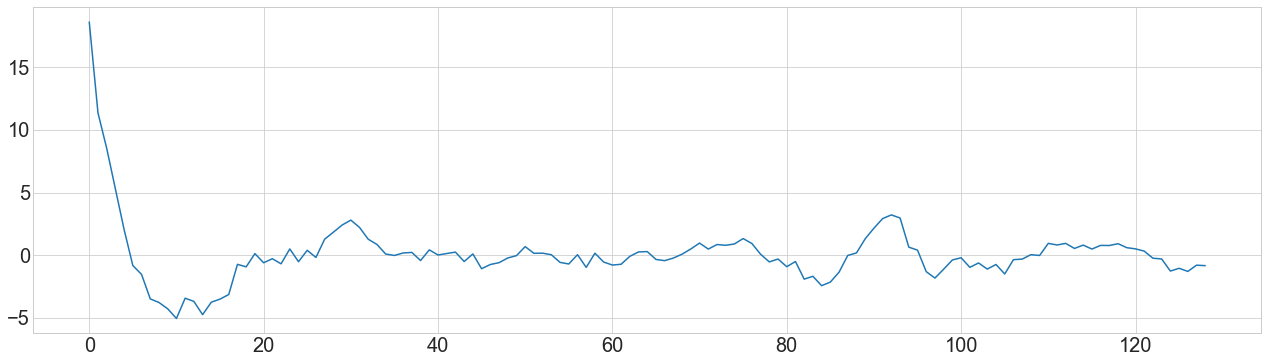

In [548]:
plt.plot(autocorr((mean_temp_day_actual_centered)))

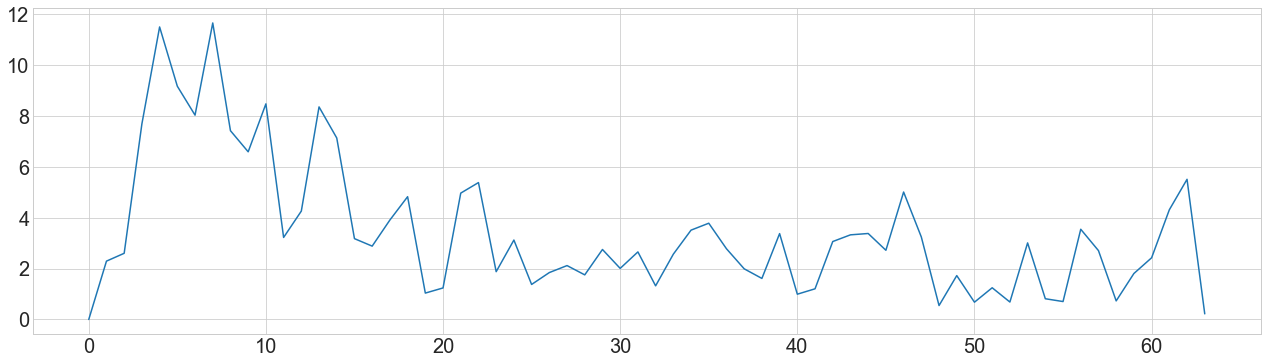

In [549]:
X = np.fft.fft(mean_temp_day_actual_centered)
plt.plot(abs(X)[:int(len(X)/2)])

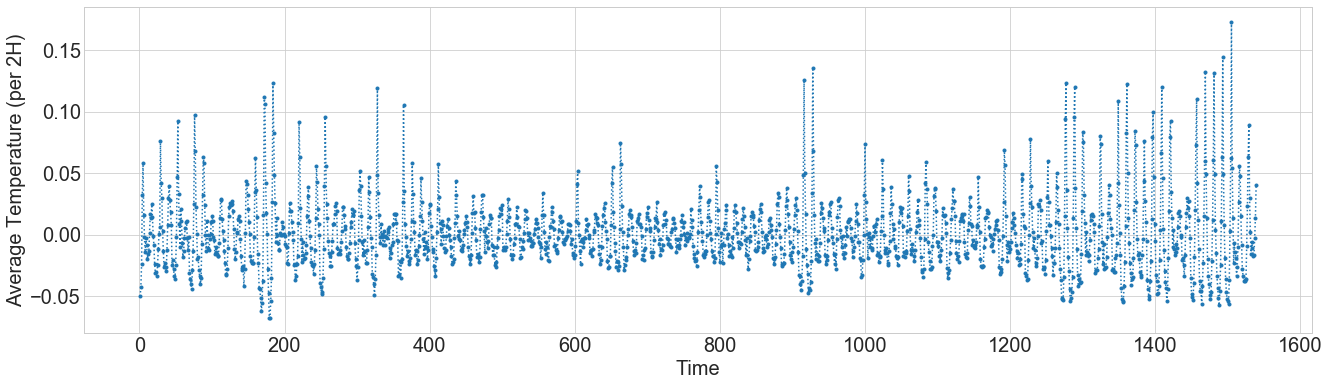

In [184]:
plt.plot(range(1, len(mean_temp_2H)+1), mean_temp_2H, linestyle=':', marker='.')
# plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Average Temperature (per 2H)')
plt.show()

<Container object of 3 artists>

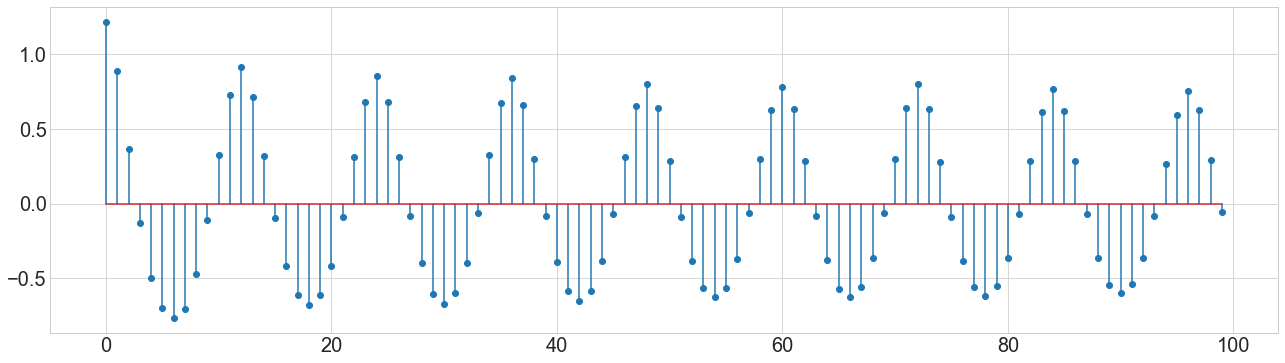

In [185]:
plt.stem(autocorr(mean_temp_2H)[:100])

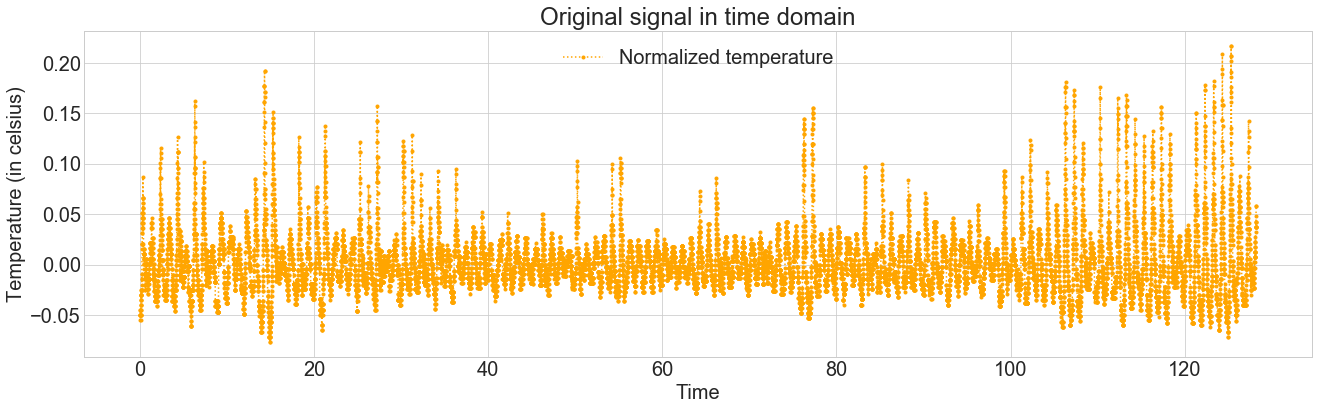

In [250]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_shifted_day'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
# plt.plot(x_range, df_data['Temperature_piecewise_day'], linestyle='--', color="black", label = "piecewise (day)")
plt.legend()
plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Temperature (in celsius)')
plt.show()

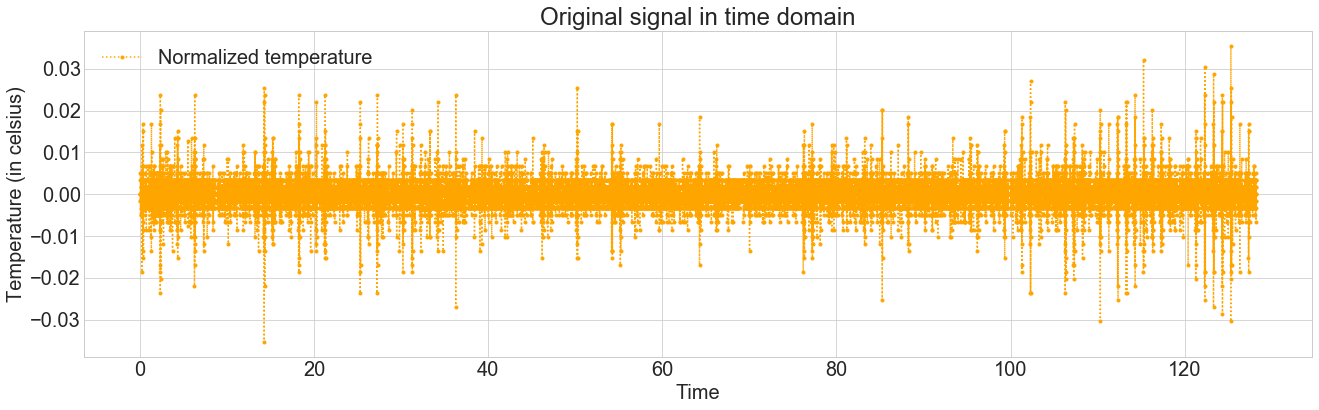

In [340]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['Temperature_normalized'])+1)]
plt.plot(x_range, df_data['Temperature_shifted_week'], linestyle=':', marker='.', color="orange", label="Normalized temperature")
# plt.plot(x_range, df_data['Temperature_piecewise_day'], linestyle='--', color="black", label = "piecewise (day)")
plt.legend()
plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Temperature (in celsius)')
plt.show()

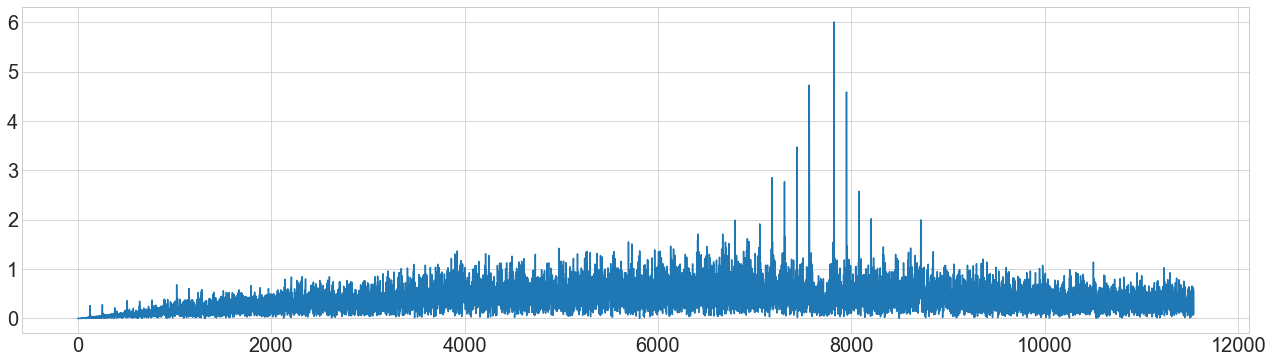

In [341]:
X = np.fft.fft(df_data['Temperature_shifted_week'])
plt.plot(abs(X)[:int(len(X)/2)])
# plt.set_ylim([0, 10])

In [342]:
for i in range(int(len(X)/2)):
    if abs(X[i]) > 3:
        print((i+1)/180)

41.31666666666667
42.022222222222226
42.02777777777778
42.03333333333333
43.455555555555556
44.166666666666664


In [579]:
actual = []
shift_by_one = []
shift_by_two = []
shift_by_three = []
for i in range(3, len(mean_temp_day_actual_centered)):
    actual.append(mean_temp_day_actual_centered[i])
    shift_by_one.append(mean_temp_day_actual_centered[i-1])
    shift_by_two.append(mean_temp_day_actual_centered[i-2])
    shift_by_three.append(mean_temp_day_actual_centered[i-3])

In [591]:
regression_df = pd.DataFrame()
# regression_df['x3'] = list(shift_by_three)
# regression_df['x2'] = list(shift_by_two)
regression_df['x1'] = list(shift_by_one)
regression_df['y'] = list(actual)

In [592]:
X_train = regression_df[['x3', 'x2', 'x1']]
# X_train = regression_df['x1']
y_train = regression_df['y']

In [593]:
from sklearn import linear_model

In [604]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(xcc, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [585]:
y_pred = regr.predict(X_train)

In [586]:
y_pred = [i+mean for i in y_pred]
actual = [i+mean for i in actual]

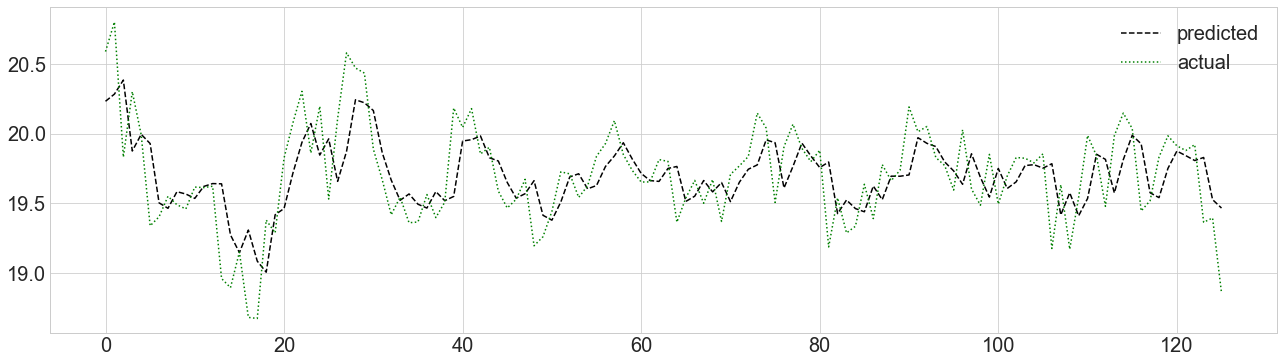

In [587]:
plt.plot(y_pred, linestyle='--', color="black", label='predicted')
plt.plot(actual, linestyle=':', color="green", label='actual')
plt.legend()
plt.show()

In [588]:
from statsmodels.tsa.arima_model import ARIMA

In [590]:
# fit model
model = ARIMA(actual, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  126
Model:                     ARMA(3, 0)   Log Likelihood                 -21.881
Method:                       css-mle   S.D. of innovations              0.287
Date:                Tue, 27 Mar 2018   AIC                             53.762
Time:                        18:01:13   BIC                             67.944
Sample:                             0   HQIC                            59.524
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7040      0.072    272.430      0.000      19.562      19.846
ar.L1.y        0.5767      0.090      6.373      0.000       0.399       0.754
ar.L2.y        0.1265      0.107      1.183      0.2